<a href="https://colab.research.google.com/github/jethyalol/QuestGen/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from IPython.display import Markdown, display, clear_output
from nltk import tokenize
from scipy import stats
from IPython.core.debugger import set_trace
from pathlib import Path

In [ ]:
import _pickle as cPickle
from pathlib import Path

def dumpPickle(fileName, content):
    pickleFile = open(fileName, 'wb')
    cPickle.dump(content, pickleFile, -1)
    pickleFile.close()

def loadPickle(fileName):
    file = open(fileName, 'rb')
    content = cPickle.load(file)
    file.close()

    return content

def pickleExists(fileName):
    file = Path(fileName)

    if file.is_file():
        return True

    return False

In [ ]:
train = pd.read_json('/content/train-v1.1.json', orient='column')

In [ ]:
train.head()

,data,version
0,"{'title': 'University_of_Notre_Dame', 'paragra...",1.1
1,"{'title': 'Beyoncé', 'paragraphs': [{'context'...",1.1
2,"{'title': 'Montana', 'paragraphs': [{'context'...",1.1
3,"{'title': 'Genocide', 'paragraphs': [{'context...",1.1
4,"{'title': 'Antibiotics', 'paragraphs': [{'cont...",1.1


In [ ]:
titlesCount = len(train['data'])
totalParagraphsCount = 0
totalQuestionsCount = 0

for titleId in range(titlesCount):
    paragraphsCount = len(train['data'][titleId]['paragraphs'])
    totalParagraphsCount += paragraphsCount

    for paragraphId in range(paragraphsCount):
        questionsCount = len(train['data'][titleId]['paragraphs'][paragraphId]['qas'])

        totalQuestionsCount += questionsCount

print('Titles', titlesCount)
print('Paragraphs', totalParagraphsCount)
print('Questions', totalQuestionsCount)

Titles 442
Paragraphs 18896
Questions 87599


In [ ]:
titles = []
for titleId in range(len(train['data'])):
    titles.append(train['data'][titleId]['title'])

for i in range(20):
    print(titles[i])

University_of_Notre_Dame
Beyoncé
Montana
Genocide
Antibiotics
Frédéric_Chopin
Sino-Tibetan_relations_during_the_Ming_dynasty
IPod
The_Legend_of_Zelda:_Twilight_Princess
Spectre_(2015_film)
2008_Sichuan_earthquake
New_York_City
To_Kill_a_Mockingbird
Solar_energy
Tajikistan
Anthropology
Portugal
Kanye_West
Buddhism
American_Idol


In [ ]:
def extractSentence(paragraph, answerStart):

    sentences = tokenize.sent_tokenize(paragraph)
    sentenceStart = 0

    for sentence in sentences:
        if (sentenceStart + len(sentence) >= answerStart):
            return sentence

        sentenceStart += len(sentence) + 1

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
paragraph = train['data'][0]['paragraphs'][0]['context']
answerStart = train['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['answer_start']

sentence = extractSentence(paragraph, answerStart)
print(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858.


In [ ]:
def containedInText(text, question):

    questionWords = tokenize.word_tokenize(question.lower())
    textWords = tokenize.word_tokenize(text.lower())
    wordsContained = 0

    for questionWord in questionWords:
        for textWord in textWords:
            if (questionWord == textWord):
                wordsContained += 1
                break

    return wordsContained / len(questionWords)

In [ ]:
question =  train['data'][0]['paragraphs'][0]['qas'][0]['question']

contained = containedInText(sentence, question)

In [ ]:
# !pip install pandas>=1.2.3
# !pip install spacy==2.2.0
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz#egg=en_core_web_sm
!pip install gensim>=3.8.3
# !pip install sklearn
# !pip install matplotlib>=3.3.4
# !pip install nltk>=3.5

print('Question')
print(question)
print('Sentence')
print(sentence)
print("Contained")
print(contained)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 73.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019105 sha256=45b5c6ebd0d5e17c11cd584655db6e5cec06d6e34035ebbecb792e705e06cabe
  Stored in directory: /root/.cache/pip/wheels/67/69/71/861327450e548c51b1054fd67ebb24295f5affa755b3babcf8
Successfully built en_core_web_sm
  Attempting uninstall: en_core_web_sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstalled en-core-web-sm-3.7.1
Question
To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Sentence
It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858.
Contained
0.6428571428571429


In [ ]:
#Printint the percentage completed
def printPercentage(currentStep, maxStep):
    stepSize = maxStep / 100

    if (int(currentStep / stepSize) > ((currentStep - 1) / stepSize)):
        clear_output()
        print('{}%'.format(int(currentStep / stepSize)))

In [ ]:
questionContainmentDfPickleName = '/content/questionContainmentDf.pkl'
if (pickleExists(questionContainmentDfPickleName)):
    print("Pickle found. Saved some time.")
    questionContainmentDf = loadPickle(questionContainmentDfPickleName)
# sentenceScore = []
# paragraphScore = []

# #For each title
# titlesCount = len(train['data'])
# for titleId in range(titlesCount):
#     printPercentage(titleId, titlesCount)

#         #For each paragraph
#     for paragraphId in range(len(train['data'][titleId]['paragraphs'])):
#         paragraph = train['data'][titleId]['paragraphs'][paragraphId]['context']

#             #For each question
#         for questionId in range(len(train['data'][titleId]['paragraphs'][paragraphId]['qas'])):
#             question = train['data'][titleId]['paragraphs'][paragraphId]['qas'][questionId]['question']
#             answerStart = train['data'][titleId]['paragraphs'][paragraphId]['qas'][questionId]['answers'][0]['answer_start']
#             sentence = extractSentence(paragraph, answerStart)

#             sentenceScore.append(containedInText(sentence, question))
#             paragraphScore.append(containedInText(paragraph, question))

#     #Merge dataframes into one
# sentenceScoreDf = pd.DataFrame(sentenceScore, columns=['sentence'])
# paragraphScoreDf = pd.DataFrame(paragraphScore, columns=['paragraph'])

# questionContainmentDf = pd.concat([sentenceScoreDf, paragraphScoreDf], axis=1)

#     #Pickle the result
# dumpPickle(questionContainmentDfPickleName, questionContainmentDf)

# print("Result not pickled. Generating...")

Pickle found. Saved some time.


In [ ]:
questionContainmentDf.describe()

,sentence,paragraph
count,87599.000000,87599.000000
mean,0.462758,0.581347
std,0.190615,0.159041
min,0.000000,0.000000
25%,0.333333,0.500000
50%,0.461538,0.600000
75%,0.600000,0.700000
max,1.000000,1.000000


In [ ]:

def getQuestionAt(index):
    currentIndex = 0

    for titleId in range(len(train['data'])):
        for paragraphId in range(len(train['data'][titleId]['paragraphs'])):
            for questionId in range(len(train['data'][titleId]['paragraphs'][paragraphId]['qas'])):
                if (currentIndex == index):
                    return titleId, paragraphId, questionId
                currentIndex += 1

In [ ]:
getQuestionAt(8)

(0, 1, 3)

In [ ]:
def showQuestion(titleId, paragraphId, questionId):

    title = train['data'][titleId]['title']
    paragraph = train['data'][titleId]['paragraphs'][paragraphId]['context']
    question = train['data'][titleId]['paragraphs'][paragraphId]['qas'][questionId]['question']
    answer = train['data'][titleId]['paragraphs'][paragraphId]['qas'][questionId]['answers'][0]['text']
    answerStart = train['data'][titleId]['paragraphs'][paragraphId]['qas'][questionId]['answers'][0]['answer_start']

    print('Title')
    print(title)
    print('Paragraph')
    print(paragraph)
    print('Question')
    print(question)
    print('Answer')
    print(answerStart)
    print(answer)

In [ ]:
titleId = 0
paragraphId = 1
questionId = 3

showQuestion(titleId, paragraphId, questionId)

Title
University_of_Notre_Dame
Paragraph
As at most other universities, Notre Dame's students run a number of news media outlets. The nine student-run outlets include three newspapers, both a radio and television station, and several magazines and journals. Begun as a one-page journal in September 1876, the Scholastic magazine is issued twice monthly and claims to be the oldest continuous collegiate publication in the United States. The other magazine, The Juggler, is released twice a year and focuses on student literature and artwork. The Dome yearbook is published annually. The newspapers have varying publication interests, with The Observer published daily and mainly reporting university and other news, and staffed by students from both Notre Dame and Saint Mary's College. Unlike Scholastic and The Dome, The Observer is an independent publication and does not have a faculty advisor or any editorial oversight from the University. In 1987, when some students believed that The Observer

In [ ]:
!pip install spacy==2.3.5
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 37.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en_core_web_sm 2.2.0
    Uninstalling en_core_web_sm-2.2.0:
      Successfully uninstalled en_core_web_sm-2.2.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_s

In [ ]:
from tqdm import tqdm

In [ ]:
import time

for i in tqdm(range(10)):
    time.sleep(0.5)

100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


In [ ]:
import _pickle as cPickle
from pathlib import Path

def dumpPickle(fileName, content):
    pickleFile = open(fileName, 'wb')
    cPickle.dump(content, pickleFile, -1)
    pickleFile.close()

def loadPickle(fileName):
    file = open(fileName, 'rb')
    content = cPickle.load(file)
    file.close()

    return content

def pickleExists(fileName):
    file = Path(fileName)

    if file.is_file():
        return True

    return False

In [ ]:
currText = train['data'][0]['paragraphs'][0]['context']
currQas = train['data'][0]['paragraphs'][0]['qas']

In [ ]:
currDoc = nlp(currText)

In [ ]:
def extractAnswers(qas, doc):
    answers = []
    senStart = 0
    senId = 0
    for sentence in doc.sents:
        senLen = len(sentence.text)
        for answer in qas:
            answerStart = answer['answers'][0]['answer_start']
            if (answerStart >= senStart and answerStart < (senStart + senLen)):
                answers.append({'sentenceId': senId, 'text': answer['answers'][0]['text']})
        senStart += senLen
        senId += 1

    return answers

In [ ]:
currAnswers = extractAnswers(currQas, currDoc)
currAnswers

[{'sentenceId': 1, 'text': 'a golden statue of the Virgin Mary'},
 {'sentenceId': 2, 'text': 'a copper statue of Christ'},
 {'sentenceId': 3, 'text': 'the Main Building'},
 {'sentenceId': 4, 'text': 'a Marian place of prayer and reflection'},
 {'sentenceId': 5, 'text': 'Saint Bernadette Soubirous'}]

In [ ]:
def tokenIsAnswer(token, sentenceId, answers):
    for i in range(len(answers)):
        if (answers[i]['sentenceId'] == sentenceId):
            if (answers[i]['text'] == token):
                return True
    return False

In [ ]:
tokenIsAnswer('the Main Building', 4, currAnswers)

False

In [ ]:
def getNEStartIndexs(doc):
    neStarts = {}
    for ne in doc.ents:
        neStarts[ne.start] = ne

    return neStarts

In [ ]:
currNeStarts = getNEStartIndexs(currDoc)

if 6 in currNeStarts:
    print(currNeStarts[6].label_)

NORP


In [ ]:
def getSentenceStartIndexes(doc):
    senStarts = []

    for sentence in doc.sents:
        senStarts.append(sentence[0].i)

    return senStarts

def getSentenceForWordPosition(wordPos, senStarts):
    for i in range(1, len(senStarts)):
        if (wordPos < senStarts[i]):
            return i - 1
senStarts = getSentenceStartIndexes(currDoc)
senStarts

[0, 9, 25, 55, 68, 84, 108]

In [ ]:
print(getSentenceForWordPosition(50, senStarts))

2


In [ ]:
wordColums = ['text', 'isAnswer', 'titleId', 'paragrapghId', 'sentenceId','wordCount', 'NER', 'POS', 'TAG', 'DEP','shape']
wordDf = pd.DataFrame(columns=wordColums)
newWord = ['koala', True, 0, 0, 4, 1, None, None, None, None, 'xxxxx']
newWords = []
newWordsDf = pd.DataFrame(newWords, columns=wordColums)
newWordsDf

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape


In [ ]:
def addWordsForParagrapgh(newWords, titleId, paragraphId):
    text = train['data'][titleId]['paragraphs'][paragraphId]['context']
    qas = train['data'][titleId]['paragraphs'][paragraphId]['qas']

    doc = nlp(text)

    answers = extractAnswers(qas, doc)
    neStarts = getNEStartIndexs(doc)
    senStarts = getSentenceStartIndexes(doc)

    #index of word in spacy doc text
    i = 0

    while (i < len(doc)):
        #If the token is a start of a Named Entity, add it and push to index to end of the NE
        if (i in neStarts):
            word = neStarts[i]
            #add word
            currentSentence = getSentenceForWordPosition(word.start, senStarts)
            wordLen = word.end - word.start
            shape = ''
            for wordIndex in range(word.start, word.end):
                shape += (' ' + doc[wordIndex].shape_)

            newWords.append([word.text,
                            tokenIsAnswer(word.text, currentSentence, answers),
                            titleId,
                            paragraphId,
                            currentSentence,
                            wordLen,
                            word.label_,
                            None,
                            None,
                            None,
                            shape])
            i = neStarts[i].end - 1
        #If not a NE, add the word if it's not a stopword or a non-alpha (not regular letters)
        else:
            if (doc[i].is_stop == False and doc[i].is_alpha == True):
                word = doc[i]

                currentSentence = getSentenceForWordPosition(i, senStarts)
                wordLen = 1
        i+=1

In [ ]:
newWords

[]

In [ ]:
addWordsForParagrapgh(newWords, 0, 0)

In [ ]:
newWordsDf = pd.DataFrame(newWords, columns=wordColums)
newWordsDf.head()
newWordsDf[newWordsDf['isAnswer'] == True].head()

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape
5,the Main Building,True,0,0,3.0,3,FAC,None,None,None,xxx Xxxx Xxxxx
12,Saint Bernadette Soubirous,True,0,0,5.0,3,PERSON,None,None,None,Xxxxx Xxxxx Xxxxx


In [ ]:
newWordsDf[newWordsDf['isAnswer'] == True].head()

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape
5,the Main Building,True,0,0,3.0,3,FAC,None,None,None,xxx Xxxx Xxxxx
12,Saint Bernadette Soubirous,True,0,0,5.0,3,PERSON,None,None,None,Xxxxx Xxxxx Xxxxx


In [ ]:
words = []
titlesCount = 100

for titleId in tqdm(range(titlesCount)):
    paragraphsCount = len(train['data'][titleId]['paragraphs'])

    for paragraphId in range(paragraphsCount):
        addWordsForParagrapgh(words, titleId, paragraphId)

wordsDf = pd.DataFrame(words, columns=wordColums)
wordsDf.head()

100%|██████████| 100/100 [02:14<00:00,  1.34s/it]


,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape
0,Catholic,False,0,0,0.0,1,NORP,None,None,None,Xxxxx
1,the Main Building's,False,0,0,1.0,4,FAC,None,None,None,xxx Xxxx Xxxxx 'x
2,the Virgin Mary.,False,0,0,1.0,4,FAC,None,None,None,xxx Xxxxx Xxxx .
3,the Main Building,False,0,0,2.0,3,FAC,None,None,None,xxx Xxxx Xxxxx
4,Venite Ad Me Omnes,False,0,0,2.0,4,WORK_OF_ART,None,None,None,Xxxxx Xx Xx Xxxxx


In [ ]:
wordPickleName = '/content/wordsDf.pkl'

if (pickleExists(wordPickleName)):
    print("Pickle found. Saved some time.")
    wordsDf = loadPickle(wordPickleName)
#Extracting words
# words = []

# #     titlesCount = len(df['data'])
# titlesCount = 10
# for titleId in tqdm(range(titlesCount)):
#     paragraphsCount = len(train['data'][titleId]['paragraphs'])

# #         printProgress(titleId, titlesCount - 1)

#     for paragraphId in range(paragraphsCount):
#         addWordsForParagrapgh(words, titleId, paragraphId)

#     #Create the dataframe
# wordColums = ['text', 'isAnswer', 'titleId', 'paragrapghId', 'sentenceId','wordCount', 'NER', 'POS', 'TAG', 'DEP','shape']
# wordsDf = pd.DataFrame(words, columns=wordColums)

#     #Pickle the result
# dumpPickle(wordPickleName, wordsDf)
# print("Result was not pickled. You had to wait.")

In [ ]:
print("Total words for all articles:", len(wordsDf))
totalAnswers = len(wordsDf[wordsDf['isAnswer'] == True])
print(totalAnswers, 'total answers', '{:.2f}%'.format((totalAnswers / len(wordsDf)) * 100), 'of all words are answers.')

Total words for all articles: 57231
6114 total answers 10.68% of all words are answers.


In [ ]:
wordPickleName = '/content/wordsDf (2).pkl'
df = loadPickle(wordPickleName)

In [ ]:
df.head()

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape
0,Catholic,False,0,0,0.0,1,NORP,None,None,None,Xxxxx
1,the Main Building's,False,0,0,1.0,4,FAC,None,None,None,xxx Xxxx Xxxxx 'x
2,the Virgin Mary.,False,0,0,1.0,4,FAC,None,None,None,xxx Xxxxx Xxxx .
3,the Main Building,False,0,0,2.0,3,FAC,None,None,None,xxx Xxxx Xxxxx
4,Venite Ad Me Omnes,False,0,0,2.0,4,WORK_OF_ART,None,None,None,Xxxxx Xx Xx Xxxxx


In [ ]:
columnsToEncode = ['NER', 'POS', "TAG", 'DEP']

In [ ]:
for column in columnsToEncode:
    print(column)
    one_hot = pd.get_dummies(df[column])
    one_hot = one_hot.add_prefix(column + '_')

    df = df.drop(column, axis = 1)
    df = df.join(one_hot)

NER
POS
TAG
DEP


In [ ]:
df.head()

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,shape,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,NER_MONEY,NER_NORP,NER_ORDINAL,NER_ORG,NER_PERCENT,NER_PERSON,NER_PRODUCT,NER_QUANTITY,NER_TIME,NER_WORK_OF_ART
0,Catholic,False,0,0,0.0,1,Xxxxx,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,the Main Building's,False,0,0,1.0,4,xxx Xxxx Xxxxx 'x,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,the Virgin Mary.,False,0,0,1.0,4,xxx Xxxxx Xxxx .,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,the Main Building,False,0,0,2.0,3,xxx Xxxx Xxxxx,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Venite Ad Me Omnes,False,0,0,2.0,4,Xxxxx Xx Xx Xxxxx,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
columnsToDrop = ['text', 'titleId', 'paragrapghId', 'sentenceId', 'shape']
df = df.drop(columnsToDrop, axis = 1)
df.head()

,isAnswer,wordCount,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,NER_MONEY,NER_NORP,NER_ORDINAL,NER_ORG,NER_PERCENT,NER_PERSON,NER_PRODUCT,NER_QUANTITY,NER_TIME,NER_WORK_OF_ART
0,False,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x_data = df.drop(labels=['isAnswer'], axis=1)
y_data = df['isAnswer']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=4)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# # List of models
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
#     'SVM': SVC(kernel='linear', probability=True, random_state=42),
#     'k-NN': KNeighborsClassifier(n_neighbors=5)
# }

# # Evaluate each model
# for model_name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     print(f"\nModel: {model_name}")
#     print("Accuracy:", accuracy_score(y_test, y_pred))
#     print(confusion_matrix(y_test, y_pred))


Random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
correctCountRf = (y_test == y_pred_rf).sum()
print('Correctly guessed:', '{:.2f}%'.format((correctCountRf / len(y_test)) * 100))

Correctly guessed: 61.79%


In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[7861, 4925],
       [ 542,  980]])

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

42923
42923
14308
14308


In [ ]:
y_test.head()

,isAnswer
13648,False
19073,False
14994,False
23497,False
29332,False


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
predictor = gnb.fit(x_train, y_train)
y_pred = predictor.predict(x_test)
threshold = 0.7
y_pred_adjusted = np.where(y_probs > threshold, 1, 0)

In [ ]:
y_prob = predictor.predict_proba(x_test)
threshold = 0.7441376577171828  # Adjust as needed
y_pred_adjusted = (y_prob[:, 1] >= threshold).astype(int)


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)


Optimal Threshold: 0.7441376577171828


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Precision:", precision_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))


Accuracy: 0.6641039977634889
Precision: 0.17638943634213639
Recall: 0.588042049934297


In [ ]:
correctCount = (y_test == y_pred_adjusted).sum()

print('Correctly guessed:', '{:.2f}%'.format((correctCount / len(y_test)) * 100))

Correctly guessed: 66.41%


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_adjusted)

array([[8607, 4179],
       [ 627,  895]])

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

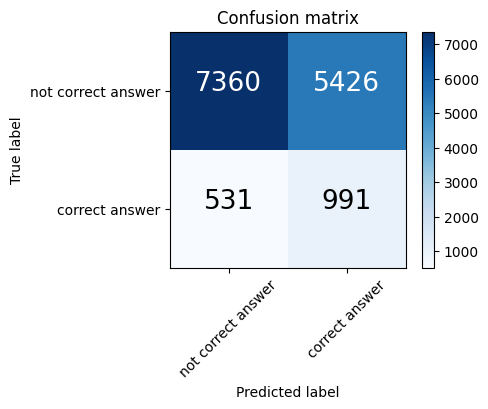

In [ ]:
import numpy as np
plot_confusion_matrix(y_test, y_pred, ['not correct answer', 'correct answer'], figsize=(5, 4))

<Axes: xlabel='isAnswer'>

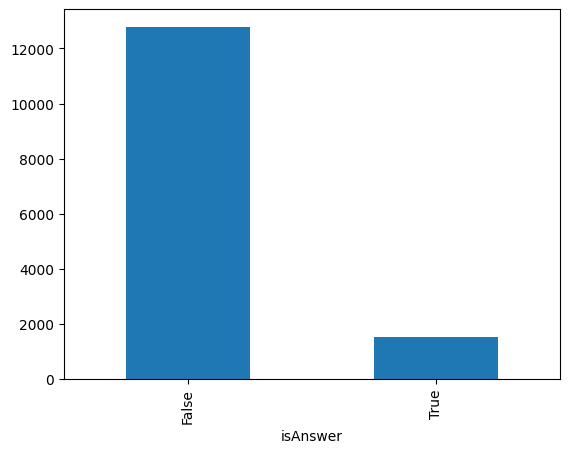

In [ ]:
y_test.value_counts().plot(kind='bar')

<Axes: >

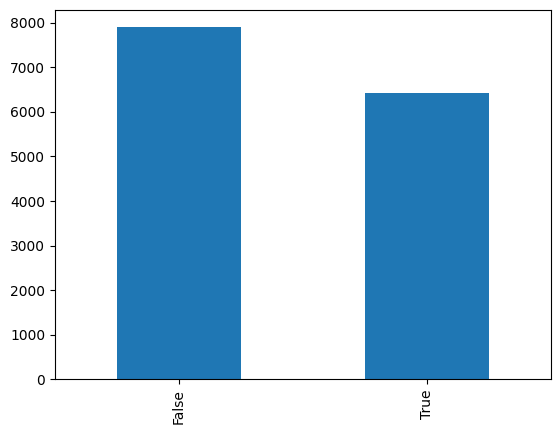

In [ ]:
y_pred_Series = pd.Series(y_pred)
y_pred_Series.value_counts().plot(kind='bar')

In [ ]:
predictorPickleName = '/content/nb-predictor.pkl'
dumpPickle(predictorPickleName, predictor)

#Because the one-hot encoding creates a different amount of features (columns in the dataframe), it is important to know which features are used in the Naive Bayes classifier as to not get into an error with different dimensions.
predictorFeaturesName = '/content/nb-predictor-features.pkl'
dumpPickle(predictorFeaturesName, list(df.columns))

In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# !mkdir -p "/content/drive/My Drive/QAIS"

# # Write a sample file to Google Drive
# with open('/content/drive/My Drive/My Folder/sample.txt', 'w') as f:
#   f.write('Hello, World!')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!mkdir -p "/content/drive/My Drive/QAIS"

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

#There seems to be a bug with spacy's stop words.
from spacy.lang.en.stop_words import STOP_WORDS
for word in STOP_WORDS:
    for w in (word, word[0].capitalize(), word.upper()):
        lex = nlp.vocab[w]
        lex.is_stop = True

#Extract answers and the sentence they are in
def extractAnswers(qas, doc):
    answers = []

    senStart = 0
    senId = 0

    for sentence in doc.sents:
        senLen = len(sentence.text)

        for answer in qas:
            answerStart = answer['answers'][0]['answer_start']

            if (answerStart >= senStart and answerStart < (senStart + senLen)):
                answers.append({'sentenceId': senId, 'text': answer['answers'][0]['text']})

        senStart += senLen
        senId += 1

    return answers

#TODO - Clean answers from stopwords?
def tokenIsAnswer(token, sentenceId, answers):
    for i in range(len(answers)):
        if (answers[i]['sentenceId'] == sentenceId):
            if (answers[i]['text'] == token):
                return True
    return False

#Save named entities start points

def getNEStartIndexs(doc):
    neStarts = {}
    for ne in doc.ents:
        neStarts[ne.start] = ne

    return neStarts

def getSentenceStartIndexes(doc):
    senStarts = []

    for sentence in doc.sents:
        senStarts.append(sentence[0].i)

    return senStarts

def getSentenceForWordPosition(wordPos, senStarts):
    for i in range(1, len(senStarts)):
        if (wordPos < senStarts[i]):
            return i - 1

def addWordsForParagrapgh(newWords, text):
    doc = nlp(text)

    neStarts = getNEStartIndexs(doc)
    senStarts = getSentenceStartIndexes(doc)

    #index of word in spacy doc text
    i = 0

    while (i < len(doc)):
        #If the token is a start of a Named Entity, add it and push to index to end of the NE
        if (i in neStarts):
            word = neStarts[i]
            #add word
            currentSentence = getSentenceForWordPosition(word.start, senStarts)
            wordLen = word.end - word.start
            shape = ''
            for wordIndex in range(word.start, word.end):
                shape += (' ' + doc[wordIndex].shape_)

            newWords.append([word.text,
                            0,
                            0,
                            currentSentence,
                            wordLen,
                            word.label_,
                            None,
                            None,
                            None,
                            shape])
            i = neStarts[i].end - 1
        #If not a NE, add the word if it's not a stopword or a non-alpha (not regular letters)
        else:
            if (doc[i].is_stop == False and doc[i].is_alpha == True):
                word = doc[i]

                currentSentence = getSentenceForWordPosition(i, senStarts)
                wordLen = 1

                newWords.append([word.text,
                                0,
                                0,
                                currentSentence,
                                wordLen,
                                None,
                                word.pos_,
                                word.tag_,
                                word.dep_,
                                word.shape_])
        i += 1

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
titleId = 0
paragraphId = 0

text = train['data'][titleId]['paragraphs'][paragraphId]['context']
text

'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.'

In [ ]:
words = []
addWordsForParagrapgh(words, text)
wordColums = ['text', 'titleId', 'paragrapghId', 'sentenceId','wordCount', 'NER', 'POS', 'TAG', 'DEP','shape']
df = pd.DataFrame(words, columns=wordColums)
df.head()

,text,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape
0,Architecturally,0,0,0.0,1,None,ADV,RB,advmod,Xxxxx
1,school,0,0,0.0,1,None,NOUN,NN,nsubj,xxxx
2,Catholic,0,0,0.0,1,NORP,None,None,None,Xxxxx
3,character,0,0,0.0,1,None,NOUN,NN,dobj,xxxx
4,Atop,0,0,1.0,1,None,ADP,IN,prep,Xxxx


In [ ]:
columnsToEncode = ['NER', 'POS', "TAG", 'DEP']

for column in columnsToEncode:
    print(column)
    one_hot = pd.get_dummies(df[column])
    one_hot = one_hot.add_prefix(column + '_')

    df = df.drop(column, axis = 1)
    df = df.join(one_hot)

NER
POS
TAG
DEP


In [ ]:
df.head()

,text,titleId,paragrapghId,sentenceId,wordCount,shape,NER_CARDINAL,NER_DATE,NER_FAC,NER_GPE,...,DEP_amod,DEP_appos,DEP_attr,DEP_compound,DEP_conj,DEP_dobj,DEP_nsubj,DEP_pobj,DEP_prep,DEP_relcl
0,Architecturally,0,0,0.0,1,Xxxxx,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,school,0,0,0.0,1,xxxx,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,Catholic,0,0,0.0,1,Xxxxx,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,character,0,0,0.0,1,xxxx,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,Atop,0,0,1.0,1,Xxxx,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
predictorFeaturesName = '/content/nb-predictor-features.pkl'
predictorColumns = loadPickle(predictorFeaturesName)

In [ ]:
wordsDf = pd.DataFrame(columns=predictorColumns)
wordsDf.head()

,isAnswer,wordCount,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,NER_MONEY,NER_NORP,NER_ORDINAL,NER_ORG,NER_PERCENT,NER_PERSON,NER_PRODUCT,NER_QUANTITY,NER_TIME,NER_WORK_OF_ART


In [ ]:
for column in wordsDf.columns:
    if (column in df.columns):
        wordsDf[column] = df[column]
    else:
        wordsDf[column] = 0
wordsDf = wordsDf.drop(['isAnswer'], axis = 1)
wordsDf.head()

,wordCount,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,NER_MONEY,NER_NORP,NER_ORDINAL,NER_ORG,NER_PERCENT,NER_PERSON,NER_PRODUCT,NER_QUANTITY,NER_TIME,NER_WORK_OF_ART
0,1,False,False,0,False,False,0,0,False,0,False,0,False,0,False,0,0,0,False
1,1,False,False,0,False,False,0,0,False,0,False,0,False,0,False,0,0,0,False
2,1,False,False,0,False,False,0,0,False,0,True,0,False,0,False,0,0,0,False
3,1,False,False,0,False,False,0,0,False,0,False,0,False,0,False,0,0,0,False
4,1,False,False,0,False,False,0,0,False,0,False,0,False,0,False,0,0,0,False


In [ ]:
predictorPickleName = '/content/nb-predictor.pkl'
predictor = loadPickle(predictorPickleName)
y_pred = predictor.predict(wordsDf)
y_pred

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True])

In [ ]:
for i in range(len(y_pred)):
    if (y_pred[i]):
        print('T', df.iloc[i]['text'])
    else:
        print('F', df.iloc[i]['text'])

F Architecturally
F school
F Catholic
F character
F Atop
T the Main Building's
F gold
F dome
F golden
F statue
T the Virgin Mary.
F Immediately
T the Main Building
F facing
F copper
F statue
F Christ
F arms
F upraised
F legend
T Venite Ad Me Omnes
T the Main Building
F Basilica
T the Sacred Heart
F Immediately
F basilica
F Grotto
F Marian
F place
F prayer
F reflection
F replica
F grotto
F Lourdes
F France
T the Virgin Mary
F reputedly
F appeared
T Saint Bernadette Soubirous
T 1858
F end
F main
F drive
F direct
F line
F connects
T 3
F statues
F the Gold Dome
F simple
F modern
F stone
F statue
T Mary


In [ ]:
def blankAnswer(firstTokenIndex, lastTokenIndex, sentStart, sentEnd, doc):
    leftPartStart = doc[sentStart].idx
    leftPartEnd = doc[firstTokenIndex].idx
    rightPartStart = doc[lastTokenIndex].idx + len(doc[lastTokenIndex])
    rightPartEnd = doc[sentEnd - 1].idx + len(doc[sentEnd - 1])

    question = doc.text[leftPartStart:leftPartEnd] + '_____' + doc.text[rightPartStart:rightPartEnd]

    return question
text="Oxygen is a chemical element with atomic number 8."
blankAnswer(0, 0, 0, 9, nlp(text))

'_____ is a chemical element with atomic number 8'

In [ ]:
def extractAnswers(qas, doc):
    answers = []

    senStart = 0
    senId = 0

    for sentence in doc.sents:
        senLen = len(sentence.text)

        for answer in qas:
            answerStart = answer['answers'][0]['answer_start']

            if (answerStart >= senStart and answerStart < (senStart + senLen)):
                answers.append({'sentenceId': senId, 'text': answer['answers'][0]['text']})

        senStart += senLen
        senId += 1

    return answers

#TODO - Clean answers from stopwords?
def tokenIsAnswer(token, sentenceId, answers):
    for i in range(len(answers)):
        if (answers[i]['sentenceId'] == sentenceId):
            if (answers[i]['text'] == token):
                return True
    return False

#Save named entities start points

def getNEStartIndexs(doc):
    neStarts = {}
    for ne in doc.ents:
        neStarts[ne.start] = ne

    return neStarts

def getSentenceStartIndexes(doc):
    senStarts = []

    for sentence in doc.sents:
        senStarts.append(sentence[0].i)

    return senStarts

def getSentenceForWordPosition(wordPos, senStarts):
    for i in range(1, len(senStarts)):
        if (wordPos < senStarts[i]):
            return i - 1

def addWordsForParagrapgh(newWords, text):
    doc = nlp(text)

    neStarts = getNEStartIndexs(doc)
    senStarts = getSentenceStartIndexes(doc)

    #index of word in spacy doc text
    i = 0

    while (i < len(doc)):
        #If the token is a start of a Named Entity, add it and push to index to end of the NE
        if (i in neStarts):
            word = neStarts[i]
            #add word
            currentSentence = getSentenceForWordPosition(word.start, senStarts)
            wordLen = word.end - word.start
            shape = ''
            for wordIndex in range(word.start, word.end):
                shape += (' ' + doc[wordIndex].shape_)

            newWords.append([word.text,
                            0,
                            0,
                            currentSentence,
                            wordLen,
                            word.label_,
                            None,
                            None,
                            None,
                            shape])
            i = neStarts[i].end - 1
        #If not a NE, add the word if it's not a stopword or a non-alpha (not regular letters)
        else:
            if (doc[i].is_stop == False and doc[i].is_alpha == True):
                word = doc[i]

                currentSentence = getSentenceForWordPosition(i, senStarts)
                wordLen = 1

                newWords.append([word.text,
                                0,
                                0,
                                currentSentence,
                                wordLen,
                                None,
                                word.pos_,
                                word.tag_,
                                word.dep_,
                                word.shape_])
        i += 1

def oneHotEncodeColumns(df):
    columnsToEncode = ['NER', 'POS', "TAG", 'DEP']

    for column in columnsToEncode:
        one_hot = pd.get_dummies(df[column])
        one_hot = one_hot.add_prefix(column + '_')

        df = df.drop(column, axis = 1)
        df = df.join(one_hot)

    return df

In [ ]:
def generateDf(text):
    words = []
    addWordsForParagrapgh(words, text)

    wordColums = ['text', 'titleId', 'paragrapghId', 'sentenceId','wordCount', 'NER', 'POS', 'TAG', 'DEP','shape']
    df = pd.DataFrame(words, columns=wordColums)

    return df

In [ ]:
def prepareDf(df):
    wordsDf = oneHotEncodeColumns(df)
    predictorFeaturesName = '/content/nb-predictor-features.pkl'
    featureNames = loadPickle(predictorFeaturesName)
    #lalallallalalal
    wordsDf = wordsDf.reindex(columns=featureNames, fill_value=0)
    # lalallalalallalal
    for feature in featureNames:
        if feature not in wordsDf.columns:
            wordsDf[feature] = 0
    columnsToDrop = ['text', 'titleId', 'paragrapghId', 'sentenceId', 'shape', 'isAnswer']
    wordsDf = wordsDf.drop(columnsToDrop, axis = 1, errors='ignore')


    return wordsDf

In [ ]:
def predictWords(wordsDf, df):

    predictorPickleName = '/content/nb-predictor.pkl'
    predictor = loadPickle(predictorPickleName)

    y_pred = predictor.predict_proba(wordsDf)

    labeledAnswers = []
    for i in range(len(y_pred)):
        labeledAnswers.append({'word': df.iloc[i]['text'], 'prob': y_pred[i][0]})

    return labeledAnswers

In [ ]:
def blankAnswer(firstTokenIndex, lastTokenIndex, sentStart, sentEnd, doc):
    leftPartStart = doc[sentStart].idx
    leftPartEnd = doc[firstTokenIndex].idx
    rightPartStart = doc[lastTokenIndex].idx + len(doc[lastTokenIndex])
    rightPartEnd = doc[sentEnd - 1].idx + len(doc[sentEnd - 1])

    question = doc.text[leftPartStart:leftPartEnd] + '_____' + doc.text[rightPartStart:rightPartEnd]

    return question

In [ ]:
def blankAnswer(firstTokenIndex, lastTokenIndex, sentStart, sentEnd, doc):
    leftPartStart = doc[sentStart].idx
    leftPartEnd = doc[firstTokenIndex].idx
    rightPartStart = doc[lastTokenIndex].idx + len(doc[lastTokenIndex])
    rightPartEnd = doc[sentEnd - 1].idx + len(doc[sentEnd - 1])

    question = doc.text[leftPartStart:leftPartEnd] + '_____' + doc.text[rightPartStart:rightPartEnd]

    return question

In [ ]:

def addQuestions(answers, text):
    doc = nlp(text)
    currAnswerIndex = 0
    qaPair = []

    #Check wheter each token is the next answer
    for sent in doc.sents:
        for token in sent:

            #If all the answers have been found, stop looking
            if currAnswerIndex >= len(answers):
                break

            #In the case where the answer is consisted of more than one token, check the following tokens as well.
            answerDoc = nlp(answers[currAnswerIndex]['word'])
            answerIsFound = True

            for j in range(len(answerDoc)):
                if token.i + j >= len(doc) or doc[token.i + j].text != answerDoc[j].text:
                    answerIsFound = False

            #If the current token is corresponding with the answer, add it
            if answerIsFound:
                question = blankAnswer(token.i, token.i + len(answerDoc) - 1, sent.start, sent.end, doc)

                qaPair.append({'question' : question, 'answer': answers[currAnswerIndex]['word'], 'prob': answers[currAnswerIndex]['prob']})

                currAnswerIndex += 1

    return qaPair
def sortAnswers(qaPairs):
    orderedQaPairs = sorted(qaPairs, key=lambda qaPair: qaPair['prob'])

    return orderedQaPairs

In [ ]:
!pip install requests
!pip install pywordnet
!pip install pywsd
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
import requests
from nltk.corpus import wordnet
from pywsd.similarity import max_similarity
from pywsd.lesk import adapted_lesk
import nltk

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def wordnet_distractors(syon, word):
    """
    Generate distractors using WordNet.
    """
    print("Generating distractors using WordNet...")
    distractors = []
    word = word.lower()
    ori_word = word

    # Replace spaces with underscores for WordNet compatibility
    if len(word.split()) > 0:
        word = word.replace(" ", "_")

    # Get hypernyms and hyponyms
    hypersyon = syon.hypernyms()
    if len(hypersyon) == 0:
        return distractors
    for i in hypersyon[0].hyponyms():
        name = i.lemmas()[0].name()
        if name == ori_word:
            continue
        name = name.replace("_", " ")
        name = " ".join(i.capitalize() for i in name.split())
        if name not in distractors:
            distractors.append(name)
    return distractors


def conceptnet_distractors(word):
    """
    Generate distractors using ConceptNet.
    """
    print("Generating distractors using ConceptNet...")
    word = word.lower()
    orig_word = word
    if len(word.split()) > 0:
        word = word.replace(" ", "_")
    distractor_list = []
    url = f"http://api.conceptnet.io/query?node=/c/en/{word}/n&rel=/r/PartOf&start=/c/en/{word}&limit=5"
    obj = requests.get(url).json()

    for edge in obj['edges']:
        link = edge['end']['term']
        url2 = f"http://api.conceptnet.io/query?node={link}&rel=/r/PartOf&end={link}&limit=10"
        obj2 = requests.get(url2).json()
        for edge in obj2['edges']:
            word2 = edge['start']['label']
            if word2 not in distractor_list and orig_word.lower() not in word2.lower():
                distractor_list.append(word2)

    return distractor_list


def word_sense(sentence, keyword):
    """
    Identify the word sense using WordNet and Lesk algorithm.
    """
    print("Identifying word sense...")
    word = keyword.lower()
    if len(word.split()) > 0:
        word = word.replace(" ", "_")

    syon_sets = wordnet.synsets(word, 'n')
    if syon_sets:
        try:
            wup = max_similarity(sentence, word, 'wup', pos='n')
            adapted_lesk_output = adapted_lesk(sentence, word, pos='n')
            lowest_index = min(syon_sets.index(wup), syon_sets.index(adapted_lesk_output))
            return syon_sets[lowest_index]
        except:
            return syon_sets[0]
    else:
        return None


def generate_distractors(word, sentence=""):
    """
    Generate distractors for a given word using WordNet and ConceptNet.
    """
    word_syon = word_sense(sentence, word) if sentence else None

    # Use WordNet if word sense exists
    if word_syon:
        distractors = wordnet_distractors(word_syon, word)
        if len(distractors) < 4:  # Fallback to ConceptNet if fewer distractors
            distractors += conceptnet_distractors(word)
    else:
        distractors = conceptnet_distractors(word)

    # Ensure unique and relevant distractors
    distractors = list(set(distractors))[:3]
    return distractors

ERROR: Could not find a version that satisfies the requirement pywordnet (from versions: none)
ERROR: No matching distribution found for pywordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
keyword = "apple"
sentence = "An apple is a fruit that grows on trees and is often red or green."
distractors = generate_distractors(keyword, sentence)
if distractors:
    print(f"Distractors for '{keyword}':\n")
    for idx, distractor in enumerate(distractors, start=1):
        print(f"{idx}. {distractor}")
else:
    print(f"No distractors found for '{keyword}'.")

Identifying word sense...
Generating distractors using WordNet...
Distractors for 'apple':

1. Medlar
2. Hog Plum
3. Freestone


In [ ]:
def generateQuestions(text, count):
    df = generateDf(text)
    wordsDf = prepareDf(df)
    labeledAnswers = predictWords(wordsDf, df)
    qaPairs = addQuestions(labeledAnswers, text)
    orderedQaPairs = sortAnswers(qaPairs)
    for i in range(count):
        distractors = generate_distractors(orderedQaPairs[i]['answer'], text)
        display(Markdown('### Question ' + str(i + 1) + ':'))
        print(orderedQaPairs[i]['question'])
        question=orderedQaPairs[i]['question']
        display(Markdown('#### Answer:'))
        print(orderedQaPairs[i]['answer'])
        if distractors:
            print(f"Distractors for '{orderedQaPairs[i]['answer']}':\n")
            for idx, distractor in enumerate(distractors, start=1):
                print(f"{idx}. {distractor}")
        else:
            print(f"No distractors found for '{orderedQaPairs[i]['answer']}'.")
        print()

In [ ]:
text="An apple is a fruit that grows on trees and is often red or green."
generateQuestions(text, 3)

Identifying word sense...
Generating distractors using WordNet...


### Question 1:

An _____ is a fruit that grows on trees and is often red or green.


#### Answer:

apple
Distractors for 'apple':

1. Medlar
2. Hog Plum
3. Freestone

Identifying word sense...
Generating distractors using WordNet...


### Question 2:

An apple is a _____ that grows on trees and is often red or green.


#### Answer:

fruit
Distractors for 'fruit':

1. Fructification
2. Antheridium
3. Style

Identifying word sense...
Generating distractors using ConceptNet...


### Question 3:

An apple is a fruit that _____ on trees and is often red or green.


#### Answer:

grows
No distractors found for 'grows'.



In [1]:
!pip install --quiet  datasets #to access squad dataset
!pip install --quiet pyarrow   #to deal with parquet files for saving dataset if required
# !pip install --quiet  tqdm     #for progress bars
!pip install --quiet transformers # for t5 model
!pip install --quiet tokenizers  #tokenizers from HuggingFace
!pip install --quiet sentencepiece #subword tokenizer used by T5
!pip install --quiet pytorch-lightning # pytorch wrapper
!pip install --quiet torchtext # text utilities

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#imports
# !pip install datasets
import pandas as pd
import torch
from tqdm import tqdm
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from pprint import pprint
import copy

In [3]:
device  = 'cuda' if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
pd.options.display.max_rows , pd.options.display.max_columns  = 100,100

In [5]:
def create_pandas_dataset(data,
                          answer_threshold=7,
                          verbose = False):
  count_long ,count_short = 0 , 0
  result_df  = pd.DataFrame(columns = ['context', 'answer','question'])
  for index,val in enumerate(tqdm(data)):
      passage = val['context']
      question = val['question']
      answer = val['answers']['text'][0]
      no_of_words = len(answer.split())
      if no_of_words >= answer_threshold:
          count_long = count_long + 1
          continue
      else:
          result_df.loc[count_short] = [passage] + [answer] + [question]
          count_short = count_short + 1
  if verbose:
    return (result_df,
            count_long,
            count_short)
  else:
    return result_df

In [6]:
train_dataset = load_dataset('squad', split='train')
valid_dataset = load_dataset('squad', split='validation')
print(f"Total Train Samples:{len(train_dataset)} , Total Validation Samples:{len(valid_dataset)}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Total Train Samples:87599 , Total Validation Samples:10570


In [7]:
sample_validation_dataset = next(iter(valid_dataset))
pprint (sample_validation_dataset)

context = sample_validation_dataset['context']
question = sample_validation_dataset['question']
answer = sample_validation_dataset['answers']['text'][0]
print('---------------'*9)
print('\nBreaking it Down\n')
print ("context:",context)
print ("question:",question)
print ("answer:",answer)

{'answers': {'answer_start': [177, 177, 177],
             'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']},
 'context': 'Super Bowl 50 was an American football game to determine the '
            'champion of the National Football League (NFL) for the 2015 '
            'season. The American Football Conference (AFC) champion Denver '
            'Broncos defeated the National Football Conference (NFC) champion '
            'Carolina Panthers 24–10 to earn their third Super Bowl title. The '
            "game was played on February 7, 2016, at Levi's Stadium in the San "
            'Francisco Bay Area at Santa Clara, California. As this was the '
            '50th Super Bowl, the league emphasized the "golden anniversary" '
            'with various gold-themed initiatives, as well as temporarily '
            'suspending the tradition of naming each Super Bowl game with '
            'Roman numerals (under which the game would have been known as '
            '"Super

In [8]:
df_train , df_validation = create_pandas_dataset(train_dataset) , create_pandas_dataset(valid_dataset)
print(f"\n Total Train Samples:{df_train.shape} , Total Validation Samples:{df_validation.shape}")

100%|██████████| 10570/10570 [00:10<00:00, 970.24it/s]


 Total Train Samples:(78664, 3) , Total Validation Samples:(9652, 3)


In [9]:
# Saving data for future use
df_train.to_parquet('train_squad.parquet')
df_validation.to_parquet('validation_squad.parquet')

In [10]:
from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer,
    get_linear_schedule_with_warmup
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [11]:
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small',model_max_length=512)
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small')

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [12]:
class QuestionGenerationDataset(Dataset):
    def __init__(self, tokenizer, filepath, max_len_inp=512,max_len_out=96):
        self.path = filepath

        self.passage_column = "context"
        self.answer = "answer"
        self.question = "question"

        # self.data = pd.read_csv(self.path)
        self.data = pd.read_parquet(self.path).iloc[:2000,:]

        self.max_len_input = max_len_inp
        self.max_len_output = max_len_out
        self.tokenizer = tokenizer
        self.inputs = []
        self.targets = []
        self._build()

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, index):
        source_ids = self.inputs[index]["input_ids"].squeeze()
        target_ids = self.targets[index]["input_ids"].squeeze()

        src_mask = self.inputs[index]["attention_mask"].squeeze()  #squeeze to get rid of the batch dimension
        target_mask = self.targets[index]["attention_mask"].squeeze()  # convert [batch,dim] to [dim]

        labels = copy.deepcopy(target_ids)
        labels [labels==0] = -100

        return {"source_ids": source_ids, "source_mask": src_mask, "target_ids": target_ids, "target_mask": target_mask,"labels":labels}

    def _build(self):
        for rownum,val in tqdm(self.data.iterrows()): # Iterating over the dataframe
            passage,answer,target = val[self.passage_column],val[self.answer],val[self.question]

            input_ = f"context: {passage}  answer: {answer}" # T5 Input format for question answering tasks
            target = f"question: {str(target)}" # Output format we require

            # tokenize inputs
            tokenized_inputs = self.tokenizer.batch_encode_plus(
                [input_], max_length=self.max_len_input,padding='max_length',
                truncation = True,return_tensors="pt"
            )
            # tokenize targets
            tokenized_targets = self.tokenizer.batch_encode_plus(
                [target], max_length=self.max_len_output,padding='max_length',
                truncation = True,
                return_tensors="pt"
            )

            self.inputs.append(tokenized_inputs)
            self.targets.append(tokenized_targets)

In [13]:
train_path = '/content/train_squad.parquet' # change this accordingly
validation_path = '/content/validation_squad.parquet'
train_dataset = QuestionGenerationDataset(t5_tokenizer,train_path)
validation_dataset = QuestionGenerationDataset(t5_tokenizer,validation_path)

2000it [00:03, 622.42it/s]
2000it [00:02, 703.71it/s]


In [14]:
train_sample = train_dataset[50] # thanks to __getitem__
decoded_train_input = t5_tokenizer.decode(train_sample['source_ids'])
decoded_train_output = t5_tokenizer.decode(train_sample['target_ids'])
print(decoded_train_input)
print(decoded_train_output)

context: In 1882, Albert Zahm (John Zahm's brother) built an early wind tunnel used to compare lift to drag of aeronautical models. Around 1899, Professor Jerome Green became the first American to send a wireless message. In 1931, Father Julius Nieuwland performed early work on basic reactions that was used to create neoprene. Study of nuclear physics at the university began with the building of a nuclear accelerator in 1936, and continues now partly through a partnership in the Joint Institute for Nuclear Astrophysics. answer: Professor Jerome Green</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

In [15]:


























!pip install pytorch_lightning





import pytorch_lightning as pl
from torch.optim import AdamW
import argparse
from transformers import (
    get_linear_schedule_with_warmup
  )

class T5Tuner(pl.LightningModule):

    def __init__(self,t5model, t5tokenizer,batchsize=4):
        super().__init__()
        self.model = t5model
        self.tokenizer = t5tokenizer
        self.batch_size = batchsize

    def forward( self, input_ids, attention_mask=None,
                decoder_attention_mask=None,
                lm_labels=None):

         outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_attention_mask=decoder_attention_mask,
            labels=lm_labels,
        )

         return outputs

    def training_step(self, batch, batch_idx):
        outputs = self.forward(
            input_ids=batch["source_ids"],
            attention_mask=batch["source_mask"],
            decoder_attention_mask=batch['target_mask'],
            lm_labels=batch['labels']
        )

        loss = outputs[0]
        self.log('train_loss',loss)
        return loss

    def validation_step(self, batch, batch_idx):
        outputs = self.forward(
            input_ids=batch["source_ids"],
            attention_mask=batch["source_mask"],
            decoder_attention_mask=batch['target_mask'],
            lm_labels=batch['labels']
        )

        loss = outputs[0]
        self.log("val_loss",loss)
        return loss

    def train_dataloader(self):
        return DataLoader(train_dataset, batch_size=self.batch_size,
                          num_workers=2)

    def val_dataloader(self):
        return DataLoader(validation_dataset,
                          batch_size=self.batch_size,
                          num_workers=2)

    def configure_optimizers(self):
        optimizer = AdamW(self.parameters(), lr=3e-4, eps=1e-8)
        return optimizer

In [16]:
model = T5Tuner(t5_model,t5_tokenizer)

trainer = pl.Trainer(max_epochs = 3,accelerator=device)

trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params | Mode
------------------------------------------------------------
0 | model | T5ForConditionalGeneration | 60.5 M | eval
------------------------------------------------------------
60.5 M    Trainable params
0         Non-trainable params
60.5 M    Total params
242.026   Total estimated model params size (MB)
0         Modules in train mode
277       Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [17]:
# saving the model
!mkdir "t5_tokenizer"
!mkdir "t5_trained_model"
model.model.save_pretrained('t5_trained_model')
t5_tokenizer.save_pretrained('t5_tokenizer')

('t5_tokenizer/tokenizer_config.json',
 't5_tokenizer/special_tokens_map.json',
 't5_tokenizer/spiece.model',
 't5_tokenizer/added_tokens.json')

In [18]:
trained_model_path = 't5_trained_model'
trained_tokenizer = 't5_tokenizer'
device = 'cpu'

In [19]:
model = T5ForConditionalGeneration.from_pretrained(trained_model_path)
tokenizer = T5Tokenizer.from_pretrained(trained_tokenizer)

In [20]:
context ="President Donald Trump said and predicted that some states would reopen this month."
answer = "Donald Trump"
text = "context: "+context + " " + "answer: " + answer
print(text)

context: President Donald Trump said and predicted that some states would reopen this month. answer: Donald Trump


In [21]:
context ="Since its topping out in 2013, One World Trade Center in New York City has been the tallest skyscraper in the United States."
answer = "World Trade Center"
text = "context: "+context + " " + "answer: " + answer
print(text)

context: Since its topping out in 2013, One World Trade Center in New York City has been the tallest skyscraper in the United States. answer: World Trade Center


In [22]:
encoding = tokenizer.encode_plus(text,max_length =512,padding='max_length',
                                 truncation = True,
                                 return_tensors="pt").to(device)
print (encoding.keys())
input_ids,attention_mask  = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

dict_keys(['input_ids', 'attention_mask'])


In [23]:

def genques(model, tokenizer, device, context, answer, max_length=72, num_beams=5, num_return_sequences=2):
    """
    Generate questions based on the given context and answer using a pre-trained language model.

    Parameters:
        model: The pre-trained language model.
        tokenizer: The tokenizer for the model.
        device: The device ('cpu' or 'cuda') for computation.
        context: The input context string.
        answer: The input answer string.
        max_length: The maximum length of the generated questions.
        num_beams: The number of beams for beam search.
        num_return_sequences: The number of question variations to generate.

    Returns:
        A list of generated questions.
    """
    # Prepare the input text
    text = f"context: {context} answer: {answer}"

    # Tokenize the input
    encoding = tokenizer.encode_plus(
        text,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    ).to(device)

    input_ids, attention_mask = encoding["input_ids"], encoding["attention_mask"]

    # Ensure the model is in evaluation mode
    model.eval()

    # Generate questions
    beam_outputs = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        early_stopping=True,
        num_beams=num_beams,
        num_return_sequences=num_return_sequences
    )

    # Decode and clean up the generated questions
    questions = [
        tokenizer.decode(beam_output, skip_special_tokens=True, clean_up_tokenization_spaces=True)
        for beam_output in beam_outputs
    ]

    return questions

In [24]:
# Example arguments
context = '''Retinol is one of the best-known skin care ingredients on the market. An over-the-counter (OTC) version of retinoids, retinol is derived (made from) vitamin A and is primarily used to treat mature-looking skin concerns as well as acne.

That said, retinols are not the same products as prescription retinoids, which are more powerful. However, retinol is still the strongest OTC version available, compared with OTC retinoids such as retinaldehyde and retinyl palmate.

Retinol has many potential skin care benefits, but there are side effects to consider, too.'''
answer = "retinols"

# Call the function
questions = genques(
    model=model,
    tokenizer=tokenizer,
    device=device,
    context=context,
    answer=answer
)

# Print the results
for i, question in enumerate(questions, 1):
    print(f"Question {i}: {question}")


Question 1: question: What are the same products as prescription retinoids?
Question 2: question: What are two types of products that are more powerful than prescription?


In [25]:
model.eval()
beam_outputs = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    max_length=72, # How long the generated questions should be
    early_stopping=True,
    num_beams=10,
    num_return_sequences=5
)

for beam_output in beam_outputs:
    sent = tokenizer.decode(beam_output, skip_special_tokens=True,clean_up_tokenization_spaces=True)
    print(sent)

question: What is New York City's biggest skyscraper?
question: What is New York City's largest skyscraper?
question: What is New York City the tallest skyscraper?
question: What building has become the tallest skyscraper?
question: What building has become the tallest skyscraper in New York City?


In [26]:
text="The Independence Day of India, which is celebrated religiously throughout the Country on the 15th of August every year, holds tremendous ground in the list of national days, since it reminds every Indian about the dawn of a new beginning, the beginning of an era of deliverance from the clutches of British colonialism of more than 200 years. It was on 15th August 1947 that India was declared independent from British colonialism, and the reins of control were handed over to the leaders of the Country. India's gaining of independence was a tryst with destiny, as the struggle for freedom was a long and tiresome one, witnessing the sacrifices of many freedom fighters, who laid down their lives on the line."
ans="India"
questions = genques(
    model=model,
    tokenizer=tokenizer,
    device=device,
    context=text,
    answer=ans
)
for i, question in enumerate(questions, 1):
    print(f"Question {i}: {question}")

Question 1: question: Who is celebrated on the 15th of August 1947?
Question 2: question: What country was declared independent on 15 August 1947?


In [27]:
text="An apple is a fruit that grows on trees and is often red or green."
generateQuestions(text, 1)

NameError: name 'generateQuestions' is not defined

In [ ]:
text="The Independence Day of India, which is celebrated religiously throughout the Country on the 15th of August every year, holds tremendous ground in the list of national days, since it reminds every Indian about the dawn of a new beginning, the beginning of an era of deliverance from the clutches of British colonialism of more than 200 years. It was on 15th August 1947 that India was declared independent from British colonialism, and the reins of control were handed over to the leaders of the Country. India's gaining of independence was a tryst with destiny, as the struggle for freedom was a long and tiresome one, witnessing the sacrifices of many freedom fighters, who laid down their lives on the line."

generateQuestionsEntities(text, 4)

In [28]:
def generateQuestionsEntities(text, count):
    # Generate a DataFrame from text
    df = generateDf(text)

    # Prepare DataFrame for predictions
    wordsDf = prepareDf(df)

    # Predict answers from words
    labeledAnswers = predictWords(wordsDf, df)

    # Generate QA pairs
    qaPairs = addQuestions(labeledAnswers, text)

    # Order QA pairs (e.g., based on confidence)
    orderedQaPairs = sortAnswers(qaPairs)

    # Collect generated questions
    all_questions = []

    # Generate questions using T5 for each QA pair
    for i in range(min(count, len(orderedQaPairs))):
        answer = orderedQaPairs[i]['answer']
        context = orderedQaPairs[i]['question']

        # Generate questions using T5
        questions = genques(
            model=model,
            tokenizer=tokenizer,
            device=device,
            context=context,
            answer=answer
        )

        # Add generated questions to the list
        all_questions.append({
            "answer": answer,
            "context": context,
            "questions": questions
        })

    # Print the results
    for i, qa in enumerate(all_questions, 1):
        print(f"Context: {qa['context']}")
        print(f"Answer: {qa['answer']}")
        for j, question in enumerate(qa['questions'], 1):
            print(f"Question {i}.{j}: {question}")
        print("\n")

In [ ]:
!pip install gradio

In [ ]:
!pip install fpdf

In [ ]:
import gradio as gr

# Define your question generation function
def generate_questions_and_distractors(text, num_questions):
    # Call your functions to process the input
    # Example: text = process_text(text)
    questions = []  # Replace with your actual question generation logic
    for i in range(num_questions):
        questions.append(f"Q{i + 1}: Example Question for '{text}'")
    return "\n".join(questions)

# Create the Gradio interface
interface = gr.Interface(
    fn=generate_questions_and_distractors,  # Function to execute
    inputs=[gr.Textbox(lines=5, label="Input Text"), gr.Number(label="Number of Questions")],
    outputs=gr.Textbox(label="Generated Questions")
)

# Launch the interface
interface.launch()

In [ ]:
from evaluate import load

def evaluate_model(model, tokenizer, dataset, sample_size=0.5):
    metric_bleu = load("bleu")
    metric_rouge = load("rouge")

    sampled_dataset = dataset.select(range(int(len(dataset) * sample_size)))
    predictions, references = [], []

    for item in sampled_dataset:
        input_text = f"context: {item['context']} answer: {item['answer']}"
        input_ids = tokenizer(input_text, return_tensors='pt').input_ids
        output_ids = model.model.generate(input_ids)
        generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        predictions.append(generated_text)
        references.append([item['question']])

    bleu_score = metric_bleu.compute(predictions=predictions, references=references)
    rouge_score = metric_rouge.compute(predictions=predictions, references=references)

    print("BLEU Score:", bleu_score)
    print("ROUGE Score:", rouge_score)

evaluate_model(model, model.tokenizer, validation_dataset)

In [29]:
def generate_questions(model, tokenizer, dataloader):
    model.eval()  # Set model to evaluation mode
    predictions, references = [], []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["source_ids"].to(model.device)
            attention_mask = batch["source_mask"].to(model.device)

            # Generate questions
            outputs = model.model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=96)
            decoded_preds = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
            decoded_refs = [tokenizer.decode(ref, skip_special_tokens=True) for ref in batch["target_ids"]]

            predictions.extend(decoded_preds)
            references.extend(decoded_refs)

    return predictions, references

# Get validation predictions
val_preds, val_refs = generate_questions(model, t5_tokenizer, model.val_dataloader())

AttributeError: 'T5ForConditionalGeneration' object has no attribute 'val_dataloader'

In [31]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=db4df1c16ed2ffbcae7f12bb397c495dcf8fedfe81f9f8911c2328cea407ed2b
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [33]:
# !pip install nltk
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer
from datasets import load_dataset
import sacrebleu
from rouge_score import rouge_scorer
import nltk
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK data is downloaded
nltk.download("wordnet")
nltk.download("punkt")
nltk.download('punkt_tab')

# Load saved model and tokenizer
model_path = "/content/t5_trained_model"
tokenizer_path = "/content/t5_tokenizer"
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(tokenizer_path)

# Load validation dataset
valid_dataset = load_dataset("squad", split="validation")

# Move model to appropriate device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

# Function to generate question
def generate_question(context, answer):
    text = f"context: {context} answer: {answer}"
    encoding = tokenizer.encode_plus(text, max_length=512, padding="max_length", truncation=True, return_tensors="pt").to(device)

    with torch.no_grad():
        output = model.generate(
            input_ids=encoding["input_ids"],
            attention_mask=encoding["attention_mask"],
            max_length=72,
            early_stopping=True,
            num_beams=5
        )

    question = tokenizer.decode(output[0], skip_special_tokens=True)
    return question.replace("question:", "").strip()

# Evaluate on a subset of validation set
references = []
predictions = []
for data in valid_dataset.select(range(10570)):  # Evaluate on 100 samples
    generated_question = generate_question(data["context"], data["answers"]["text"][0])
    references.append([data["question"]])  # BLEU expects nested lists for multiple references
    predictions.append(generated_question)

# Compute BLEU scores
bleu1 = sacrebleu.corpus_bleu(predictions, references, smooth_method="exp", use_effective_order=True).score
bleu2 = sacrebleu.corpus_bleu(predictions, references, smooth_method="exp", use_effective_order=True).precisions[1]
bleu3 = sacrebleu.corpus_bleu(predictions, references, smooth_method="exp", use_effective_order=True).precisions[2]
bleu4 = sacrebleu.corpus_bleu(predictions, references, smooth_method="exp", use_effective_order=True).precisions[3]

# Compute METEOR scores (Fix: Tokenizing inputs)
def meteor_score(reference, hypothesis):
    return nltk.translate.meteor_score.meteor_score(
        [word_tokenize(reference)], word_tokenize(hypothesis)
    )

meteor_scores = [meteor_score(ref[0], pred) for ref, pred in zip(references, predictions)]
meteor_avg = sum(meteor_scores) / len(meteor_scores)

# Compute ROUGE scores
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
rouge_scores = [scorer.score(ref[0], pred) for ref, pred in zip(references, predictions)]

rouge1_avg = sum([score["rouge1"].fmeasure for score in rouge_scores]) / len(rouge_scores)
rouge2_avg = sum([score["rouge2"].fmeasure for score in rouge_scores]) / len(rouge_scores)
rougeL_avg = sum([score["rougeL"].fmeasure for score in rouge_scores]) / len(rouge_scores)

# Print Scores
# print(f"BLEU-1 Score: {bleu1:.2f}")
# print(f"BLEU-2 Score: {bleu2:.2f}")
# print(f"BLEU-3 Score: {bleu3:.2f}")
# print(f"BLEU-4 Score: {bleu4:.2f}")
print(f"METEOR Score: {meteor_avg:.4f}")
print(f"ROUGE-1 Score: {rouge1_avg:.4f}")
print(f"ROUGE-2 Score: {rouge2_avg:.4f}")
print(f"ROUGE-L Score: {rougeL_avg:.4f}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:

# for data in valid_dataset.select(range(10000)):  # Evaluate on 100 samples
#     generated_question = generate_question(data["context"], data["answers"]["text"][0])
#     references.append([data["question"]])  # BLEU expects nested lists for multiple references
#     predictions.append(generated_question)

# # Compute BLEU scores for different n-gram orders
bleu1 = sacrebleu.corpus_bleu(predictions, references, smooth_method="exp", use_effective_order=True).score
bleu2 = sacrebleu.corpus_bleu(predictions, references, smooth_method="exp", use_effective_order=True).precisions[1]
bleu3 = sacrebleu.corpus_bleu(predictions, references, smooth_method="exp", use_effective_order=True).precisions[2]
bleu4 = sacrebleu.corpus_bleu(predictions, references, smooth_method="exp", use_effective_order=True).precisions[3]

# Print BLEU scores
print(f"BLEU-1 Score: {bleu1:.2f}")
print(f"BLEU-2 Score: {bleu2:.2f}")
print(f"BLEU-3 Score: {bleu3:.2f}")
print(f"BLEU-4 Score: {bleu4:.2f}")

In [ ]:
import torch
# from transformers import T5Tokenizer
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Ensure required resources are available
nltk.download('punkt')

# Load tokenizer (assuming the same tokenizer was used during training)
tokenizer = T5Tokenizer.from_pretrained("/content/t5_tokenizer")  # Change if using another variant

def calculate_bleu_score(predictions, references):
    """
    Computes the BLEU score for a list of predicted and reference sentences.

    :param predictions: List of generated questions
    :param references: List of corresponding reference questions
    :return: BLEU score (0-100 scale)
    """
    total_bleu = 0.0
    num_samples = len(predictions)

    for pred, ref in zip(predictions, references):
        # Tokenization
        pred_tokens = nltk.word_tokenize(pred.lower())
        ref_tokens = [nltk.word_tokenize(ref.lower())]  # List of one reference sentence

        # Compute BLEU score with smoothing
        bleu = sentence_bleu(ref_tokens, pred_tokens, smoothing_function=SmoothingFunction().method1)
        total_bleu += bleu

    # Compute average BLEU score
    avg_bleu = (total_bleu / num_samples) * 100  # Convert to percentage scale
    return avg_bleu

def evaluate_model(model, dataloader, device):
    """
    Evaluates the model on the training dataset and calculates the BLEU score.

    :param model: The trained T5 model
    :param dataloader: Dataloader containing input texts and reference questions
    :param device: Device (CPU/GPU) to run the model on
    :return: BLEU score of the model on the dataset
    """
    model.eval()
    predictions = []
    references = []

    with torch.no_grad():
        for batch in dataloader:
            input_texts = batch["input_text"]
            ref_questions = batch["target_text"]

            # Move input tensors to device
            input_encodings = tokenizer(input_texts, padding=True, truncation=True, return_tensors="pt").to(device)

            # Generate output
            output_ids = model.generate(input_encodings["input_ids"], max_length=50)
            generated_texts = [tokenizer.decode(ids, skip_special_tokens=True) for ids in output_ids]

            # Store predictions and references
            predictions.extend(generated_texts)
            references.extend(ref_questions)

    # Calculate BLEU score
    bleu_score = calculate_bleu_score(predictions, references)
    return bleu_score

# Assuming `model` is your trained T5 model and `train_dataloader` is your training dataset loader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_bleu_score = evaluate_model(model, train_dataloader, device)
print(f"BLEU Score on Training Data: {train_bleu_score:.2f}")


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_bleu_scores(predictions, references):
    """
    Computes BLEU-1, BLEU-2, BLEU-3, BLEU-4 scores.

    :param predictions: List of generated questions
    :param references: List of corresponding reference questions
    :return: Dictionary with BLEU-1 to BLEU-4 scores
    """
    smoothing = SmoothingFunction().method1
    total_bleu1, total_bleu2, total_bleu3, total_bleu4 = 0.0, 0.0, 0.0, 0.0
    num_samples = len(predictions)

    for pred, ref in zip(predictions, references):
        # Tokenization
        pred_tokens = nltk.word_tokenize(pred.lower())
        ref_tokens = [nltk.word_tokenize(ref.lower())]  # List of one reference sentence

        # Compute individual BLEU scores
        total_bleu1 += sentence_bleu(ref_tokens, pred_tokens, weights=(1, 0, 0, 0), smoothing_function=smoothing)
        total_bleu2 += sentence_bleu(ref_tokens, pred_tokens, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing)
        total_bleu3 += sentence_bleu(ref_tokens, pred_tokens, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothing)
        total_bleu4 += sentence_bleu(ref_tokens, pred_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothing)

    # Compute average scores
    bleu_scores = {
        "BLEU-1": (total_bleu1 / num_samples) * 100,
        "BLEU-2": (total_bleu2 / num_samples) * 100,
        "BLEU-3": (total_bleu3 / num_samples) * 100,
        "BLEU-4": (total_bleu4 / num_samples) * 100
    }

    return bleu_scores

In [ ]:
def evaluate_model(model, dataloader, device):
    """
    Evaluates the model on the training dataset and calculates BLEU-1 to BLEU-4 scores.

    :param model: The trained T5 model
    :param dataloader: Dataloader containing input texts and reference questions
    :param device: Device (CPU/GPU) to run the model on
    :return: BLEU-1, BLEU-2, BLEU-3, BLEU-4 scores
    """
    model.eval()
    predictions = []
    references = []

    with torch.no_grad():
        for batch in dataloader:
            input_texts = batch["input_text"]
            ref_questions = batch["target_text"]

            # Move input tensors to device
            input_encodings = tokenizer(input_texts, padding=True, truncation=True, return_tensors="pt").to(device)

            # Generate output
            output_ids = model.generate(input_encodings["input_ids"], max_length=50)
            generated_texts = [tokenizer.decode(ids, skip_special_tokens=True) for ids in output_ids]

            # Store predictions and references
            predictions.extend(generated_texts)
            references.extend(ref_questions)

    # Calculate BLEU-1 to BLEU-4 scores
    bleu_scores = calculate_bleu_scores(predictions, references)
    return bleu_scores


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_bleu_scores = evaluate_model(model, DataLoader, device)
print(f"BLEU-1: {train_bleu_scores['BLEU-1']:.2f}")
print(f"BLEU-2: {train_bleu_scores['BLEU-2']:.2f}")
print(f"BLEU-3: {train_bleu_scores['BLEU-3']:.2f}")
print(f"BLEU-4: {train_bleu_scores['BLEU-4']:.2f}")
